In [1]:
library("tidyverse")
library("cooccur")

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /mnt/ndata/arvind/envs/R_4/lib/libopenblasp-r0.3.25.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Zurich
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] cooccur_1.3     lubridate_1.9.3 forcats_1.0.0   stringr_1.5.1  
 [5] dplyr_1.1.4     purrr_1.0.2     readr_2.1.5     tidyr_1.3.0    
 [9] tibble_3.2.1    ggplot2_3.4.4   tidyverse_2.0.0

loaded via a namespace (and not attach

In [3]:
filter_run_data <- function(run_data,gene_order,sample_order){
    final_run_data<-run_data
    final_run_data$M$M$missense<-run_data$M$M$missense[gene_order,sample_order]
    final_run_data$M$M$truncating<-run_data$M$M$truncating[gene_order,sample_order]
    final_run_data$alteration.class<- run_data$alteration.class[gene_order]
    final_run_data$sample.class<-run_data$sample.class[sample_order]
    final_run_data$M$tmb$missense<-run_data$M$tmb$missense[sample_order,]
    final_run_data$M$tmb$truncating<-run_data$M$tmb$truncating[sample_order,]
    return(final_run_data)
}

# LUAD

In [4]:
run_data <- readRDS('/mnt/ndata/arvind/co_mutation_project/data/processed/gams/pan_can_tcga_run_data.rds')

In [5]:
sample_covariates<-run_data$sample.class

In [6]:
luad_samples <- names(sample_covariates[(which(sample_covariates %in% c('LUAD')))])

In [10]:
data<- filter_run_data(run_data = run_data,gene_order = names(run_data$alteration.class),sample_order = luad_samples)

In [19]:
globa_gam<-data$M$M[[1]]+data$M$M[[2]][rownames(data$M$M[[1]]),colnames(data$M$M[[1]])]
globa_gam[globa_gam>1]<-1

In [20]:
dim(globa_gam)

[1] 396 502

In [21]:
cooccur.gam <- cooccur(mat = globa_gam, type = "spp_site",thresh = TRUE, spp_names = TRUE)

  |======================================================================| 100%


In [22]:
summary(cooccur.gam)

Call:
cooccur(mat = globa_gam, type = "spp_site", thresh = TRUE, spp_names = TRUE)

Of 78210 species pair combinations, 77922 pairs (99.63 %) were removed from the analysis because expected co-occurrence was < 1 and 288 pairs were analyzed

Cooccurrence Summary:


       Species          Sites       Positive       Negative         Random 
         396.0          502.0           14.0           17.0          257.0 
Unclassifiable Non-random (%) 
           0.0           10.8 
attr(,"class")
[1] "summary.cooccur"

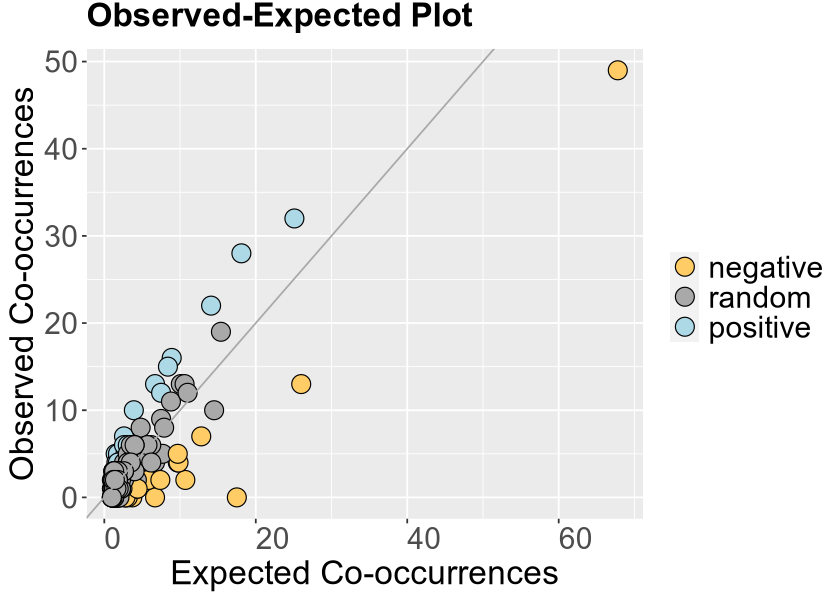

In [23]:
options(repr.plot.width = 7, repr.plot.height = 5)
cooccur::obs.v.exp(cooccur.gam)

In [24]:
cooccur.gam$results %>% filter(p_gt<=0.05)

sp1,sp2,sp1_inc,sp2_inc,obs_cooccur,prob_cooccur,exp_cooccur,p_lt,p_gt,sp1_name,sp2_name
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
5,35,22,154,13,0.013,6.7,0.99887,0.00447,ATM,KRAS
5,62,22,59,7,0.005,2.6,0.99806,0.00896,ATM,STK11
7,55,35,22,5,0.003,1.5,0.99754,0.01365,BRAF,SETD2
12,63,17,221,12,0.015,7.5,0.99389,0.02299,CDKN2A,TP53
17,63,57,221,32,0.050,25.1,0.98180,0.03512,EGFR,TP53
21,35,6,154,5,0.004,1.8,0.99922,0.01168,FBXW7,KRAS
35,62,154,59,28,0.036,18.1,0.99880,0.00297,KRAS,STK11
35,223,154,29,16,0.018,8.9,0.99877,0.00412,KRAS,RBM10
37,63,6,221,6,0.005,2.6,1.00000,0.00701,MED12,TP53


In [31]:
saveRDS(cooccur.gam$results,file='/mnt/ptemp/arvind/tool_comaprision/results/cooccur_luad_all_results.rds')

## Sampling Run

In [32]:
sample_list1 <- readRDS('../data/sampling_list_luad.rds')
sample_list2 <- readRDS('../data/sampling_list_luad_2.rds')

In [33]:
str(c(sample_list1[11:15],sample_list2[11:15]))

List of 10
 $ : Named chr [1:401] "LUAD" "LUAD" "LUAD" "LUAD" ...
  ..- attr(*, "names")= chr [1:401] "TCGA-78-7539-01" "TCGA-99-8033-01" "TCGA-73-4670-01" "TCGA-75-5146-01" ...
 $ : Named chr [1:401] "LUAD" "LUAD" "LUAD" "LUAD" ...
  ..- attr(*, "names")= chr [1:401] "TCGA-75-6214-01" "TCGA-64-5775-01" "TCGA-97-A4M3-01" "TCGA-93-A4JO-01" ...
 $ : Named chr [1:401] "LUAD" "LUAD" "LUAD" "LUAD" ...
  ..- attr(*, "names")= chr [1:401] "TCGA-64-1679-01" "TCGA-64-1676-01" "TCGA-55-8505-01" "TCGA-97-8547-01" ...
 $ : Named chr [1:401] "LUAD" "LUAD" "LUAD" "LUAD" ...
  ..- attr(*, "names")= chr [1:401] "TCGA-55-8204-01" "TCGA-55-8094-01" "TCGA-49-AARE-01" "TCGA-44-A47G-01" ...
 $ : Named chr [1:401] "LUAD" "LUAD" "LUAD" "LUAD" ...
  ..- attr(*, "names")= chr [1:401] "TCGA-05-4422-01" "TCGA-49-AAR9-01" "TCGA-05-4417-01" "TCGA-55-6984-01" ...
 $ : Named chr [1:401] "LUAD" "LUAD" "LUAD" "LUAD" ...
  ..- attr(*, "names")= chr [1:401] "TCGA-91-6848-01" "TCGA-55-6971-01" "TCGA-S2-AA1A-01" "TCGA-86-

In [34]:
sample_list<-c(sample_list1[11:15],sample_list2[11:15])

In [35]:
str(sample_list)

List of 10
 $ : Named chr [1:401] "LUAD" "LUAD" "LUAD" "LUAD" ...
  ..- attr(*, "names")= chr [1:401] "TCGA-78-7539-01" "TCGA-99-8033-01" "TCGA-73-4670-01" "TCGA-75-5146-01" ...
 $ : Named chr [1:401] "LUAD" "LUAD" "LUAD" "LUAD" ...
  ..- attr(*, "names")= chr [1:401] "TCGA-75-6214-01" "TCGA-64-5775-01" "TCGA-97-A4M3-01" "TCGA-93-A4JO-01" ...
 $ : Named chr [1:401] "LUAD" "LUAD" "LUAD" "LUAD" ...
  ..- attr(*, "names")= chr [1:401] "TCGA-64-1679-01" "TCGA-64-1676-01" "TCGA-55-8505-01" "TCGA-97-8547-01" ...
 $ : Named chr [1:401] "LUAD" "LUAD" "LUAD" "LUAD" ...
  ..- attr(*, "names")= chr [1:401] "TCGA-55-8204-01" "TCGA-55-8094-01" "TCGA-49-AARE-01" "TCGA-44-A47G-01" ...
 $ : Named chr [1:401] "LUAD" "LUAD" "LUAD" "LUAD" ...
  ..- attr(*, "names")= chr [1:401] "TCGA-05-4422-01" "TCGA-49-AAR9-01" "TCGA-05-4417-01" "TCGA-55-6984-01" ...
 $ : Named chr [1:401] "LUAD" "LUAD" "LUAD" "LUAD" ...
  ..- attr(*, "names")= chr [1:401] "TCGA-91-6848-01" "TCGA-55-6971-01" "TCGA-S2-AA1A-01" "TCGA-86-

In [ ]:
result_vec<-list()
for(i in c(1:10)){
    order<-names(sample_list[[i]])
    data<- filter_run_data(run_data = run_data,gene_order = names(run_data$alteration.class),sample_order = names(sample_list[[i]]))
    sample_covariates<-run_data$sample.class
    sample_covariates<-sample_covariates[[order]]
    data <- list('M'=data,'sample.class' = data$sample_covariates,'alteration.class' = data$alteration_covariates)
    gam<-data$M$M[[1]]+data$M$M[[2]][rownames(data$M$M[[1]]),colnames(data$M$M[[1]])]
    gam[gam>1]<-1
    cooccur.gam <- cooccur(mat = gam, type = "spp_site",thresh = TRUE, spp_names = TRUE)
    saveRDS(cooccur.gam$results,file=paste('/mnt/ptemp/arvind/tool_comaprision/results/sampling_run_result_80_',i,'.rds',sep=""))
    result_vec[[i]]<-cooccur.gam$results
}

# TCGA pan-cancer

In [25]:
run_data <- readRDS('/mnt/ndata/arvind/co_mutation_project/data/processed/gams/pan_can_tcga_run_data.rds')

In [26]:
str(run_data)

List of 3
 $ M               :List of 2
  ..$ M  :List of 2
  .. ..$ missense  : num [1:396, 1:9082] 0 0 0 0 0 0 0 0 0 0 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:396] "AKT1" "ALK" "APC" "AR" ...
  .. .. .. ..$ : chr [1:9082] "TCGA-02-0047-01" "TCGA-02-0055-01" "TCGA-AB-2805-03" "TCGA-AB-2806-03" ...
  .. ..$ truncating: num [1:396, 1:9082] 0 0 0 0 0 0 0 0 0 0 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:396] "AKT1" "ALK" "APC" "AR" ...
  .. .. .. ..$ : chr [1:9082] "TCGA-02-0047-01" "TCGA-02-0055-01" "TCGA-AB-2805-03" "TCGA-AB-2806-03" ...
  ..$ tmb:List of 2
  .. ..$ missense  :'data.frame':	9082 obs. of  2 variables:
  .. .. ..$ sample  : chr [1:9082] "TCGA-02-0047-01" "TCGA-02-0055-01" "TCGA-AB-2805-03" "TCGA-AB-2806-03" ...
  .. .. ..$ mutation: num [1:9082] 56 47 40 422 214 588 14 8 19 8 ...
  .. ..$ truncating:'data.frame':	9082 obs. of  2 variables:
  .. .. ..$ sample  : chr [1:9082] "TCGA-02-0047-01" "TCGA-02-0055-01" "TCGA-

In [29]:
globa_gam<-run_data$M$M[[1]]+run_data$M$M[[2]][rownames(run_data$M$M[[1]]),colnames(run_data$M$M[[1]])]
globa_gam[globa_gam>1]<-1

In [30]:
dim(globa_gam)

[1]  396 9082

In [70]:
cooccur.gam <- cooccur(mat = globa_gam, type = "spp_site",thresh = TRUE, spp_names = TRUE)

  |======================================================================| 100%


In [71]:
summary(cooccur.gam)

Call:
cooccur(mat = globa_gam, type = "spp_site", thresh = TRUE, spp_names = TRUE)

Of 78210 species pair combinations, 72339 pairs (92.49 %) were removed from the analysis because expected co-occurrence was < 1 and 5871 pairs were analyzed

Cooccurrence Summary:


       Species          Sites       Positive       Negative         Random 
         396.0         9082.0         2957.0          141.0         2773.0 
Unclassifiable Non-random (%) 
           0.0           52.8 
attr(,"class")
[1] "summary.cooccur"

In [73]:
cooccur.gam$results %>% filter(p_gt<=0.05)

sp1,sp2,sp1_inc,sp2_inc,obs_cooccur,prob_cooccur,exp_cooccur,p_lt,p_gt,sp1_name,sp2_name
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,7,66,611,12,0.000,4.4,0.99962,0.00132,AKT1,BRAF
1,15,66,294,6,0.000,2.1,0.99473,0.01955,AKT1,CTNNB1
1,55,66,176,4,0.000,1.3,0.99110,0.03880,AKT1,SETD2
1,77,66,148,6,0.000,1.1,0.99991,0.00069,AKT1,CTCF
1,158,66,154,4,0.000,1.1,0.99489,0.02545,AKT1,ARHGAP35
1,363,66,156,4,0.000,1.1,0.99460,0.02652,AKT1,KMT2B
2,7,39,611,6,0.000,2.6,0.98596,0.04426,ALK,BRAF
2,21,39,305,4,0.000,1.3,0.99067,0.04079,ALK,FBXW7
2,35,39,684,7,0.000,2.9,0.99245,0.02466,ALK,KRAS


In [ ]:
saveRDS(cooccur.gam$results,file='/mnt/ptemp/arvind/tool_comaprision/results/cooccur_tcga_all_results.rds')

# TCGA Silent Mutations

In [6]:
load(file='/mnt/ptemp/arvind/select_x_arvind/arvind_tcga_oncokb_catalogue_all_samples_silent_gam.RData')

In [7]:
str(silent_data)

List of 3
 $ gam         : num [1:9082, 1:396] 0 0 0 0 0 0 0 0 0 0 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:9082] "TCGA-02-0055-01" "TCGA-AB-2805-03" "TCGA-AB-2806-03" "TCGA-AB-2807-03" ...
  .. ..$ : chr [1:396] "ABL1" "AKT1" "ALK" "APC" ...
 $ tmb         :'data.frame':	9082 obs. of  2 variables:
  ..$ sample  : chr [1:9082] "TCGA-AB-2803-03" "TCGA-02-0047-01" "TCGA-02-0055-01" "TCGA-AB-2805-03" ...
  ..$ mutation: num [1:9082] 0 0 1 1 3 1 8 0 0 0 ...
 $ sample.class: Named chr [1:9083] "ACC" "ACC" "ACC" "ACC" ...
  ..- attr(*, "names")= chr [1:9083] "TCGA-OR-A5J1-01" "TCGA-OR-A5J2-01" "TCGA-OR-A5J3-01" "TCGA-OR-A5J5-01" ...


In [8]:
gene_to_take <- colnames(silent_data$gam)
order <- names(silent_data$sample.class[rownames(silent_data$gam)])

data <-list('M'=list('silent'=t(silent_data$gam[order,gene_to_take])),
                    'tmb'=list('silent'=silent_data$tmb[order,]))

alteration_covariates <- rep('MUT',ncol(silent_data$gam[order,gene_to_take]))
names(alteration_covariates)<-colnames(silent_data$gam[order,gene_to_take])
sample_covariates<-silent_data$sample.class[rownames(silent_data$gam)]

In [9]:
run_data <- list('M'=data,'sample.class' = sample_covariates,'alteration.class' = alteration_covariates)

In [10]:
str(run_data)

List of 3
 $ M               :List of 2
  ..$ M  :List of 1
  .. ..$ silent: num [1:396, 1:9082] 0 0 0 0 0 0 0 0 0 0 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:396] "ABL1" "AKT1" "ALK" "APC" ...
  .. .. .. ..$ : chr [1:9082] "TCGA-02-0055-01" "TCGA-AB-2805-03" "TCGA-AB-2806-03" "TCGA-AB-2807-03" ...
  ..$ tmb:List of 1
  .. ..$ silent:'data.frame':	9082 obs. of  2 variables:
  .. .. ..$ sample  : chr [1:9082] "TCGA-02-0055-01" "TCGA-AB-2805-03" "TCGA-AB-2806-03" "TCGA-AB-2807-03" ...
  .. .. ..$ mutation: num [1:9082] 1 1 3 1 8 1 1 6 8 2 ...
 $ sample.class    : Named chr [1:9082] "GBM" "LAML" "LAML" "LAML" ...
  ..- attr(*, "names")= chr [1:9082] "TCGA-02-0055-01" "TCGA-AB-2805-03" "TCGA-AB-2806-03" "TCGA-AB-2807-03" ...
 $ alteration.class: Named chr [1:396] "MUT" "MUT" "MUT" "MUT" ...
  ..- attr(*, "names")= chr [1:396] "ABL1" "AKT1" "ALK" "APC" ...


In [12]:
globa_gam<-data$M[[1]]
globa_gam[globa_gam>1]<-1

In [13]:
dim(globa_gam)

[1]  396 9082

In [14]:
cooccur.gam <- cooccur(mat = globa_gam, type = "spp_site",thresh = TRUE, spp_names = TRUE)

  |======================================================================| 100%


In [15]:
summary(cooccur.gam)

Call:
cooccur(mat = globa_gam, type = "spp_site", thresh = TRUE, spp_names = TRUE)

Of 78210 species pair combinations, 76025 pairs (97.21 %) were removed from the analysis because expected co-occurrence was < 1 and 2185 pairs were analyzed

Cooccurrence Summary:


       Species          Sites       Positive       Negative         Random 
         396.0         9082.0         2180.0            0.0            5.0 
Unclassifiable Non-random (%) 
           0.0           99.8 
attr(,"class")
[1] "summary.cooccur"

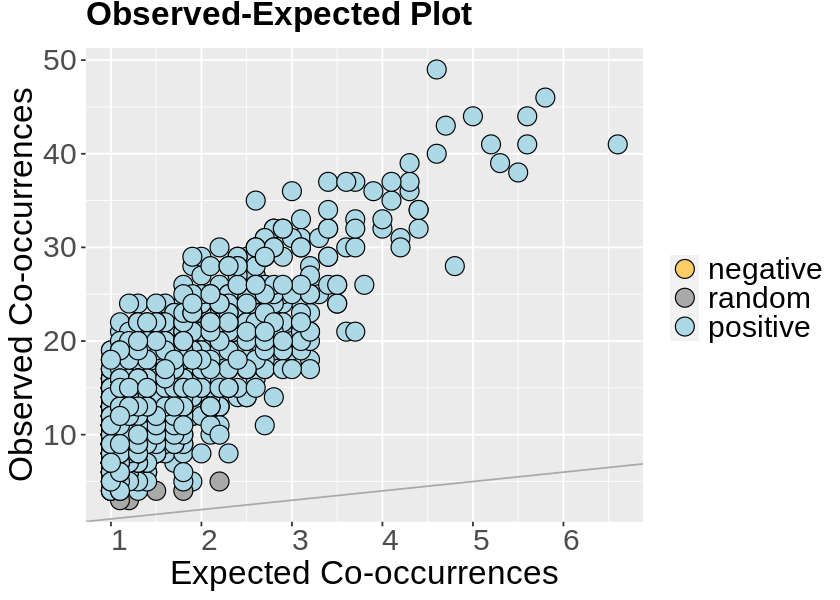

In [16]:
options(repr.plot.width = 7, repr.plot.height = 5)
cooccur::obs.v.exp(cooccur.gam)

In [20]:
cooccur.gam$results %>% filter(p_gt<=0.1)

sp1,sp2,sp1_inc,sp2_inc,obs_cooccur,prob_cooccur,exp_cooccur,p_lt,p_gt,sp1_name,sp2_name
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,40,67,239,16,0,1.8,1.00000,0.00000,ABL1,KMT2D
1,111,67,158,10,0,1.2,1.00000,0.00000,ABL1,KMT2C
1,151,67,183,9,0,1.4,1.00000,0.00001,ABL1,GRIN2A
1,183,67,212,13,0,1.6,1.00000,0.00000,ABL1,FAT1
1,193,67,202,11,0,1.5,1.00000,0.00000,ABL1,PTPRT
1,216,67,160,5,0,1.2,0.99888,0.00639,ABL1,PTPRD
1,248,67,250,9,0,1.8,0.99999,0.00008,ABL1,RELN
1,294,67,144,11,0,1.1,1.00000,0.00000,ABL1,SPEN
1,335,67,198,16,0,1.5,1.00000,0.00000,ABL1,ZFHX3


In [ ]:
saveRDS(cooccur.gam$results,file='/mnt/ptemp/arvind/tool_comaprision/results/cooccur_tcga_silent_all_results.rds')